<a href="https://colab.research.google.com/github/ivonneH123/temas_iop/blob/main/GRUPO_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook grupo5

In [ ]:
#Importamos las librerías necesarias:
import numpy as np                  #álgebra lineal
import pandas as pd                 #manejo de df
from google.colab import drive      #conexión a drive
import os                           #manejo de directorios
import seaborn as sns               #ploteos
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#visualizamos el nombre del archivo en la ruta:
os.chdir('/content/drive/My Drive/TA temas_iop')
!ls

'Clase 10. Tratamiento de data (1).pptx'
'Clase 11. Clustering.pptx'
'Clase 12. Regresiones.pptx'
'Clase 12. Regresiones v2.pptx'
'Clientes_Limabank (1).csv'
'COSAS PARA SUBIR AL CAMPUS'
 Data_Grupo5.csv
 df_regresion.csv
'Grupo 5 - Informe Caso Limabank.gdoc'
 GRUPO5.R
'PPT- INFORME GRUPO 5.pptx'
'Tarea Académica Ciclo 2019-2 (1).pptx'
 Untitled0.ipynb
 Vectores_Exito.csv
 Vectores_Exito.gsheet


# IMPORTAR LA DATA
Se importó 100000 observaciones de los datos brindados por el profesor,con una semilla de 500, perteneciente al grupo 5; se guardaron los datos extraídos en un csv, de esta manera, los datos no variarán si se desea correr nuevamente el archivo.

In [ ]:
#--------------------------------------------IMPORTAR DATA-----------------------------------------------
# DataTotal=pd.read_csv('Clientes_Limabank (1).csv')
# Data_Grupo5=DataTotal.sample(100000,random_state=500)
# Data_Grupo5.to_csv('Data_Grupo5.csv')

Data_Grupo5=pd.read_csv('Data_Grupo5.csv',index_col=0)
Data_Grupo5_copia=Data_Grupo5.copy()
Data_Grupo5.head()

,CODIGO_CLIENTE,TIPESTCIVIL,CODPAISNACIONALIDAD,INGRESO,EDAD,EDU,FORMAL,DIGITAL,DESTIPPROVINCIA,EDAD_2,TIPNIVELEDUCACIONAL,FLG_SBS_201909,FLG_MD_NEGATIVO,PERFIL_VINCULACION,FLG_DEUDASBS,SBS_DEUTOTAL,Banco1_DEUTOTAL,Banco2_DEUTOTAL,Banco3_DEUTOTAL,Banco4_DEUTOTAL,OTROS_DEUTOTAL,DIGITALIDAD,CANTIDAD_PRODUCTOS,FLG_SEGUROS,FLG_ACTIVOS,FLG_PASIVOS,FLG_INVERSION,FLG_PASIV_INV,SEMENTO_RIESGO
391850,719353,CAS,PER,3364,61,4,0,0,Lima,62.0,BAC,0.0,0.0,2. POCO VINCULADO,1,2832.51,0.00,0.00,0.0,2832.51,0.0,NO DIGITAL,0.0,0,0,0,0,0,E
399216,8294701,SOL,PER,6216,30,4,1,2,Lima,30.0,BAC,0.0,0.0,5. MUY VINCULADO,1,NaN,NaN,NaN,NaN,NaN,NaN,DIGITAL,6.0,1,1,1,0,1,B
375346,6868594,SOL,PER,9026,56,4,1,2,Lima,56.0,TIT,0.0,1.0,3. MEDIO VINCULADO,1,1162895.51,0.00,1161032.52,0.0,3.99,1859.0,DIGITAL,1.0,0,0,1,0,1,B
375393,13983134,SOL,PER,1378,38,4,0,0,Lima,38.0,BAC,0.0,0.0,3. MEDIO VINCULADO,1,39.00,39.00,0.00,0.0,0.00,0.0,INACTIVO,2.0,0,1,1,0,0,D
478726,143269,CAS,PER,7715,65,3,0,2,Lima,65.0,SEC,0.0,0.0,4. VINCULADO,1,18517.89,8971.22,9546.67,0.0,0.00,0.0,DIGITAL,4.0,1,1,1,0,1,C


In [ ]:
Data_Grupo5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 391850 to 394486
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODIGO_CLIENTE       100000 non-null  int64  
 1   TIPESTCIVIL          99856 non-null   object 
 2   CODPAISNACIONALIDAD  99851 non-null   object 
 3   INGRESO              100000 non-null  int64  
 4   EDAD                 100000 non-null  int64  
 5   EDU                  100000 non-null  int64  
 6   FORMAL               100000 non-null  int64  
 7   DIGITAL              100000 non-null  int64  
 8   DESTIPPROVINCIA      99390 non-null   object 
 9   EDAD_2               99977 non-null   float64
 10  TIPNIVELEDUCACIONAL  99856 non-null   object 
 11  FLG_SBS_201909       99988 non-null   float64
 12  FLG_MD_NEGATIVO      99988 non-null   float64
 13  PERFIL_VINCULACION   99569 non-null   object 
 14  FLG_DEUDASBS         100000 non-null  int64  
 15  SBS_DEUTOTAL

In [ ]:
Data_Grupo5.describe()

,CODIGO_CLIENTE,INGRESO,EDAD,EDU,FORMAL,DIGITAL,EDAD_2,FLG_SBS_201909,FLG_MD_NEGATIVO,FLG_DEUDASBS,SBS_DEUTOTAL,Banco1_DEUTOTAL,Banco2_DEUTOTAL,Banco3_DEUTOTAL,Banco4_DEUTOTAL,OTROS_DEUTOTAL,CANTIDAD_PRODUCTOS,FLG_SEGUROS,FLG_ACTIVOS,FLG_PASIVOS,FLG_INVERSION,FLG_PASIV_INV
count,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,99977.000000,99988.000000,99988.000000,100000.000000,5.626600e+04,5.626600e+04,5.626600e+04,5.626600e+04,5.626600e+04,5.626600e+04,99689.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.191654e+06,7728.846030,46.619400,3.60675,0.704950,1.189960,46.772038,0.101682,0.151548,0.694660,1.043815e+05,4.531932e+04,1.986588e+04,1.582711e+04,1.417857e+04,9.190583e+03,2.617721,0.371580,0.432530,0.854370,0.062270,0.848770
std,5.232498e+06,6827.956026,13.458905,0.77916,0.456068,0.748492,13.458577,0.302231,0.358584,0.460554,1.915864e+05,1.203903e+05,1.021468e+05,8.260288e+04,6.165361e+04,3.894660e+04,1.851866,0.483229,0.495429,0.352737,0.241647,0.358275
min,2.930000e+02,12.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.530422e+06,5130.000000,37.000000,3.00000,0.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3.592722e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,3.507066e+06,6482.000000,45.000000,4.00000,1.000000,1.000000,45.000000,0.000000,0.000000,1.000000,3.300570e+04,2.249185e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,7.155666e+06,9058.000000,55.000000,4.00000,1.000000,2.000000,55.000000,0.000000,0.000000,1.000000,1.185262e+05,3.811042e+04,0.000000e+00,0.000000e+00,8.696375e+02,3.373032e+03,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.335342e+07,826534.000000,119.000000,4.00000,1.000000,2.000000,119.000000,1.000000,1.000000,1.000000,6.588563e+06,6.588563e+06,4.105387e+06,2.501682e+06,1.664630e+06,2.319032e+06,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualización de datos nulos
Se muestran los nulos por cada columna y se visualizaron en un mapa de calor para contar con una idea más comprensible sobre los datos.

In [ ]:
#--------------------------------------------IMPUTACIÓN DE NULOS-----------------------------------------------
# En el caso de las variables categóricas se imputará con la moda
# convertir columnas tipo objeto a string:
var_categoricos=[]
var_categoricos_int=[]
var_numericos=[]
data_columns=Data_Grupo5.columns[Data_Grupo5.columns!='CODIGO_CLIENTE']
for col in list(data_columns):
  if Data_Grupo5[col].dtype=='int':
    var_categoricos_int.append(col)
  elif Data_Grupo5[col].dtype=='object':
    Data_Grupo5[col]=Data_Grupo5[col].astype('category',cat=list(Data_Grupo5[col].value_counts().index))
    var_categoricos.append(col)
  else:
    var_numericos.append(col)
# seleccionamos las columnas con nulos en ambos casos:
nulos=Data_Grupo5.isnull().sum()
var_numericos_nulos=[i for i in var_numericos if i in nulos.loc[nulos>0].index]
var_categoricos_nulos=[i for i in var_categoricos if i in nulos.loc[nulos>0].index]

In [ ]:
var_numericos

['EDAD_2',
 'FLG_SBS_201909',
 'FLG_MD_NEGATIVO',
 'SBS_DEUTOTAL',
 'Banco1_DEUTOTAL',
 'Banco2_DEUTOTAL',
 'Banco3_DEUTOTAL',
 'Banco4_DEUTOTAL',
 'OTROS_DEUTOTAL',
 'CANTIDAD_PRODUCTOS']

Cantidad de datos nulos por columna:

CODIGO_CLIENTE             0
TIPESTCIVIL              144
CODPAISNACIONALIDAD      149
INGRESO                    0
EDAD                       0
EDU                        0
FORMAL                     0
DIGITAL                    0
DESTIPPROVINCIA          610
EDAD_2                    23
TIPNIVELEDUCACIONAL      144
FLG_SBS_201909            12
FLG_MD_NEGATIVO           12
PERFIL_VINCULACION       431
FLG_DEUDASBS               0
SBS_DEUTOTAL           43734
Banco1_DEUTOTAL        43734
Banco2_DEUTOTAL        43734
Banco3_DEUTOTAL        43734
Banco4_DEUTOTAL        43734
OTROS_DEUTOTAL         43734
DIGITALIDAD              431
CANTIDAD_PRODUCTOS       311
FLG_SEGUROS                0
FLG_ACTIVOS                0
FLG_PASIVOS                0
FLG_INVERSION              0
FLG_PASIV_INV              0
SEMENTO_RIESGO            31
dtype: int64


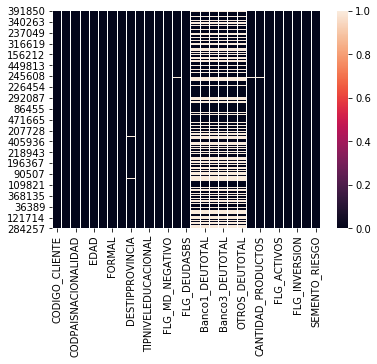

In [ ]:
#--------------------------------------------VISUALIZAR NULOS-----------------------------------------------
sns.heatmap(Data_Grupo5.isnull())
print("Cantidad de datos nulos por columna:"+'\n')
print(nulos)

Se separaron las variables categóricas de las numéricas, de esta manera se 
podrán imputar las numéricas con el paquete scikit learn. Se decidió imputar con la media debido a que no es posible usar knn ni alguna regresión, si se hiciera de esta manera, ya que al usar knn se estaría manipulando la distancia entre observaciones, lo que alteraría seriamente al modelo.
En el caso de las variables categóricas, se decidió imputar con la categoría más frecuente en cada columna.

In [ ]:
#--------------------------------------------IMPUTACIÓN DE NULOS EN COLUMNAS CATEGÓRICAS-----------------------------------------------
#columnas categoricas
print('Antes:'+ '\n',Data_Grupo5[var_categoricos_nulos].isnull().sum())

#imputar con el más frecuente:
for var_cat in var_categoricos_nulos:
  most_common=Data_Grupo5[var_cat].value_counts().index[0]
  Data_Grupo5[var_cat].fillna(most_common,inplace=True)
print( '\n'+'Después:'+ '\n',Data_Grupo5[var_categoricos].isnull().sum())


Antes:
 TIPESTCIVIL            144
CODPAISNACIONALIDAD    149
DESTIPPROVINCIA        610
TIPNIVELEDUCACIONAL    144
PERFIL_VINCULACION     431
DIGITALIDAD            431
SEMENTO_RIESGO          31
dtype: int64

Después:
 TIPESTCIVIL            0
CODPAISNACIONALIDAD    0
DESTIPPROVINCIA        0
TIPNIVELEDUCACIONAL    0
PERFIL_VINCULACION     0
DIGITALIDAD            0
SEMENTO_RIESGO         0
dtype: int64


In [ ]:
#--------------------------------------------IMPUTACIÓN DE NULOS EN COLUMNAS NUMÉRICAS-----------------------------------------------
#Debido a que clusterizaremos los datos, no es preciso imputar los nulos con KNN, ni con una regresión lineal
#, ya que podría afectar la calidad de los clusters.
#imputacion con media
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')

Data_Grupo5[var_numericos_nulos]=imp.fit_transform(Data_Grupo5[var_numericos_nulos])
pd.DataFrame(Data_Grupo5[var_numericos_nulos]).isnull().sum()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


EDAD_2                0
FLG_SBS_201909        0
FLG_MD_NEGATIVO       0
SBS_DEUTOTAL          0
Banco1_DEUTOTAL       0
Banco2_DEUTOTAL       0
Banco3_DEUTOTAL       0
Banco4_DEUTOTAL       0
OTROS_DEUTOTAL        0
CANTIDAD_PRODUCTOS    0
dtype: int64

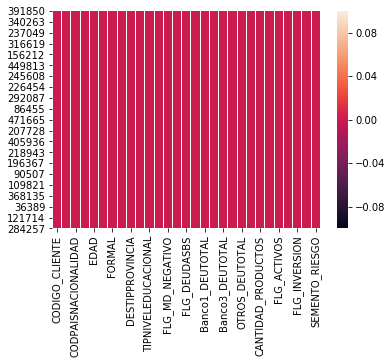

In [ ]:
#se muestra la data sin nulos:
sns.heatmap(Data_Grupo5.isnull())

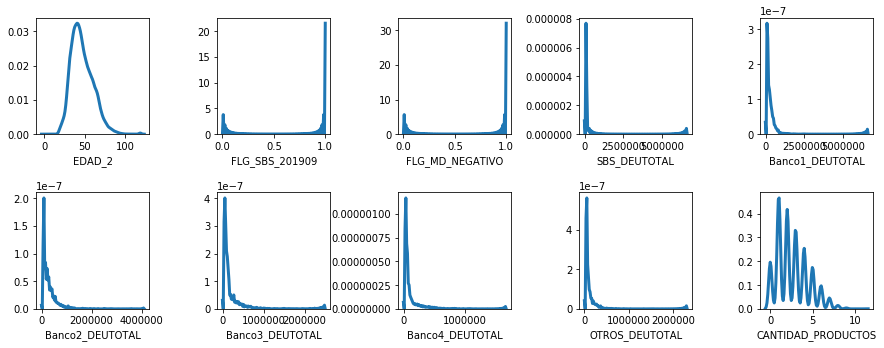

In [ ]:
#variables numéricas
# realizamos histogramas para hacer las transformaciones necesarias:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace = 0.6,hspace=0.5)
for i in range(len(var_numericos)):
  plt.subplot(5,5,i+1)
  sns.distplot(Data_Grupo5[var_numericos[i]], hist = False, kde = True,kde_kws = {'linewidth': 3})
plt.show()

In [ ]:
# transformaciones a las variables numéricas
var_num_modelo=['EDAD_2','FLG_SBS_201909','FLG_MD_NEGATIVO','CANTIDAD_PRODUCTOS']
Data_Grupo5['SBS_DEUTOTAL_trans']=np.log(Data_Grupo5['SBS_DEUTOTAL']+1)
var_num_modelo.append('SBS_DEUTOTAL_trans')

Data_Grupo5['Banco1_DEUTOTAL_trans']=np.log(Data_Grupo5['Banco1_DEUTOTAL']+1)
var_num_modelo.append('Banco1_DEUTOTAL_trans')

Data_Grupo5['Banco2_DEUTOTAL_trans']=np.log(Data_Grupo5['Banco2_DEUTOTAL']+1)
var_num_modelo.append('Banco2_DEUTOTAL_trans')

Data_Grupo5['Banco3_DEUTOTAL_trans']=np.log(Data_Grupo5['Banco3_DEUTOTAL']+1)
var_num_modelo.append('Banco3_DEUTOTAL_trans')

Data_Grupo5['Banco4_DEUTOTAL_trans']=np.log(Data_Grupo5['Banco4_DEUTOTAL']+1)
var_num_modelo.append('Banco4_DEUTOTAL_trans')

Data_Grupo5['OTROS_DEUTOTAL_trans']=np.log(Data_Grupo5['OTROS_DEUTOTAL']+1)
var_num_modelo.append('OTROS_DEUTOTAL_trans')


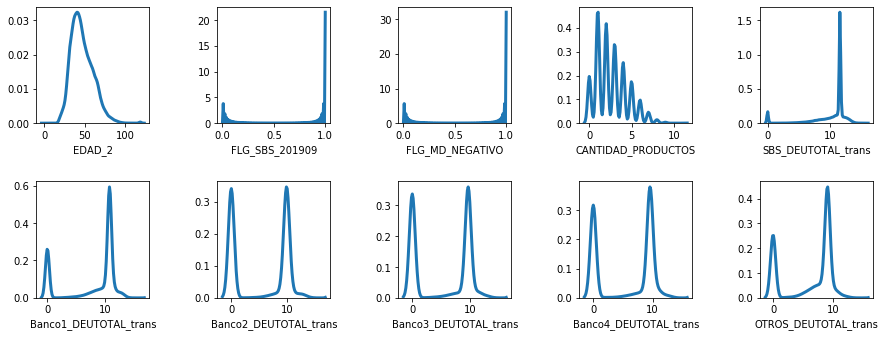

In [ ]:
#Nuevas distribuciones
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace = 0.6,hspace=0.5)
for i in range(len(var_num_modelo)):
  plt.subplot(5,5,i+1)
  sns.distplot(Data_Grupo5[var_num_modelo[i]], hist = False, kde = True,kde_kws = {'linewidth': 3})
plt.show()

In [ ]:
#--------------------------------------------------------TRATRAMIENTO DE VARIABLES CATEGÓRICAS CON ONE HOT ENCODER----------------------------------------------------------
# aplicar one hot encoder a las variables categóricas
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

x = onehotencoder.fit_transform(Data_Grupo5[var_categoricos]).toarray()

In [ ]:
#concatenamos las partes numérica y categórica
from sklearn.preprocessing import StandardScaler

Data_Grupo5.reset_index(inplace=True, drop=True)
var_modelo=var_num_modelo.copy()
var_modelo.append('CODIGO_CLIENTE')

scaler = StandardScaler()
data_norm=scaler.fit_transform(Data_Grupo5[var_num_modelo])
data_norm=pd.DataFrame(data_norm,columns=var_num_modelo)

df_completo=pd.concat([data_norm,pd.DataFrame(x),Data_Grupo5[var_categoricos_int]],axis=1)

df_completo_copy=df_completo.copy()
df_completo.head()


,EDAD_2,FLG_SBS_201909,FLG_MD_NEGATIVO,CANTIDAD_PRODUCTOS,SBS_DEUTOTAL_trans,Banco1_DEUTOTAL_trans,Banco2_DEUTOTAL_trans,Banco3_DEUTOTAL_trans,Banco4_DEUTOTAL_trans,OTROS_DEUTOTAL_trans,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,INGRESO,EDAD,EDU,FORMAL,DIGITAL,FLG_DEUDASBS,FLG_SEGUROS,FLG_ACTIVOS,FLG_PASIVOS,FLG_INVERSION,FLG_PASIV_INV
0,1.131605,-0.33646,-0.422657,-1.415769,-0.808357,-1.773253,-1.089195,-1.125132,0.479085,-1.543477,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3364,61,4,0,0,1,0,0,0,0,0
1,-1.246346,-0.33646,-0.422657,1.829273,0.434896,0.609106,0.904641,0.880906,0.820620,0.697019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6216,30,4,1,2,1,1,1,1,0,1
2,0.685739,-0.33646,2.366270,-0.874929,1.265885,-1.773253,1.724194,-1.125132,-0.865994,0.304771,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9026,56,4,1,2,1,0,0,1,0,1
3,-0.651859,-0.33646,-0.422657,-0.334088,-2.277006,-0.953570,-1.089195,-1.125132,-1.206924,-1.543477,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1378,38,4,0,0,1,0,1,1,0,0
4,1.354538,-0.33646,-0.422657,0.747592,-0.161220,0.249220,0.757018,-1.125132,-1.206924,-1.543477,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7715,65,3,0,2,1,1,1,1,0,1


# OUTLIERS

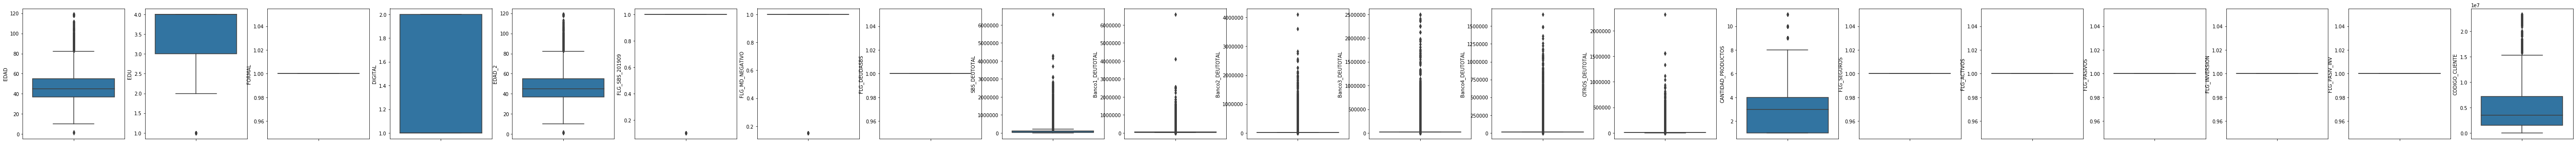

In [ ]:
#---------------------------------------------------------OUTLIERS-----------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
df=df_completo.loc[:,df_completo.columns!='CODIGO_CLIENTE']
plt.figure(figsize=(100,5))
for i in range(1,len(var_numericos)):
  var_num=var_numericos[i]
  plt.subplot(1,len(var_numericos),i)
  sns.boxplot(y=var_num,data=Data_Grupo5.loc[Data_Grupo5[var_num]!=0])
plt.show()

In [ ]:

index_outliers_edad=list(df.loc[df['EDAD']==0 & df['EDAD']].index)
index_outliers_edu=list(df.loc[df['EDU']<2].index)

q1 = df['EDAD_2'].quantile(0.25)
q3 = df['EDAD_2'].quantile(0.75)
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

index_outliers_edad_2=list(df.loc[(df['EDAD_2']<fence_low) & (df['EDAD_2']>fence_high)].index)

index_outliers_sbs=list(df.loc[df['FLG_SBS_201909']<=0.2].index)
index_outliers_md=list(df.loc[df['FLG_MD_NEGATIVO']<=0.2].index)

index_outliers_sbs_deuda=list(df.loc[df['SBS_DEUTOTAL']>=3000000 & df['SBS_DEUTOTAL']<0].index)

index_outliers_1_deuda=list(df.loc[df['Banco1_DEUTOTAL']>=3000000 & df['Banco1_DEUTOTAL']<0])

index_outliers_2_deuda=list(df.loc[df['Banco2_DEUTOTAL']>=3000000 & df['Banco2_DEUTOTAL']<0])

index_outliers_3_deuda=list(df.loc[df['Banco3_DEUTOTAL']>=2000000 & df['Banco3_DEUTOTAL']<0])

index_outliers_4_deuda=list(df.loc[df['Banco4_DEUTOTAL']>=1500000 & df['Banco4_DEUTOTAL']<0])

index_outliers_tot_deuda=list(df.loc[df['Banco4_DEUTOTAL']>=1500000 & df['Banco4_DEUTOTAL']<0])

index_outliers_otros_deuda=list(df.loc[df['OTROS_DEUTOTAL']>=1000000 & df['OTROS_DEUTOTAL']<0])

index_outliers_cant_prod=list(df.loc[df['CANTIDAD_PRODUCTOS']>8 & df['CANTIDAD_PRODUCTOS']<0])

index_outliers=index_outliers_edad+index_outliers_edu+index_outliers_edad_2+index_outliers_sbs+index_outliers_md+index_outliers_sbs_deuda+ \
                index_outliers_1_deuda+index_outliers_2_deuda+index_outliers_3_deuda+index_outliers_4_deuda+index_outliers_tot_deuda+ \
                index_outliers_otros_deuda+index_outliers_cant_prod
set(index_outliers)

TypeError: ignored

In [ ]:
#removemos outliers de las columnas:
# modificado de: https://codeday.me/es/qa/20190521/730100.html
low=0.01
high=0.99
var_outliers=['EDU','FLG_SBS_201909','FLG_MD_NEGATIVO']
filt_df=df[var_numericos].copy()
quant_df = filt_df.quantile([low, high])
quant_df

,CODIGO_CLIENTE,INGRESO,EDAD,EDU,FORMAL,DIGITAL,EDAD_2,FLG_SBS_201909,FLG_MD_NEGATIVO,FLG_DEUDASBS,SBS_DEUTOTAL,Banco1_DEUTOTAL,Banco2_DEUTOTAL,Banco3_DEUTOTAL,Banco4_DEUTOTAL,OTROS_DEUTOTAL,CANTIDAD_PRODUCTOS,FLG_SEGUROS,FLG_ACTIVOS,FLG_PASIVOS,FLG_INVERSION,FLG_PASIV_INV
0.01,59161.93,780.00,22.0,1.0,0.0,0.0,22.0,0.0,0.0,0.0,0.000,0.0000,0.000,0.000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
0.99,22854027.75,28306.01,83.0,4.0,1.0,2.0,83.0,1.0,1.0,1.0,857338.329,579194.6775,487135.471,372432.999,310538.8935,162852.647,7.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.loc[df['EDAD_2']<3) & (df['EDAD_2']>fence_high)]

SyntaxError: ignored

In [ ]:
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
#desechamos las observaciones con datos nulos, ya que estas serán las que tenían outliers
filt_df.dropna(inplace=True,how='any')

In [ ]:
#observamos las filas y columnas del nuevo dataframe
filt_df.shape

(0, 22)

# CLUSTERIZACIÓN


.# kmeans
Para encontrar el mejor número de cluster se utilizará el silhouette, que representa la distancia entre los puntos; si esta es mucha será cercano a 1, si es muy poca, cercano a 0; por lo que escogeremos el que pico mayor en la gráfica.
Se detuvo la ejecución de la celda en el k=10 debido a que el coeficiente silhouette no subió significativamente.

In [ ]:
#--------------------------------------------CLUSTERIZACIÓN-----------------------------------------------
#para definir la cantidad de clusters, se realizará un cluster con una muestra del df
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
df1=df_completo.copy()

range_n_clusters = [i for i in range(2,20)]
silhouette_list=[]

for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df1, cluster_labels)
    silhouette_list.append(silhouette_avg)
plt.plot(range_n_clusters,silhouette_list)
#se paró la ejecución en n_clusters=10, ya que los valores no subían del máximo 0.71

For n_clusters = 2 The average silhouette_score is : 0.7133371286415318
For n_clusters = 3 The average silhouette_score is : 0.7063398528670795
For n_clusters = 4 The average silhouette_score is : 0.6228865007394795
For n_clusters = 5 The average silhouette_score is : 0.5256873333824901
For n_clusters = 6 The average silhouette_score is : 0.5126021101017674
For n_clusters = 7 The average silhouette_score is : 0.5681134522740318
For n_clusters = 8 The average silhouette_score is : 0.5688079087982649
For n_clusters = 9 The average silhouette_score is : 0.570105724762829
For n_clusters = 10 The average silhouette_score is : 0.5691311930896827


KeyboardInterrupt: ignored

Debido a que la gráfica muestra el mayor pico en k=2, tomaremos ese valor para formar la cantidad de clusters.

Text(0.5, 1.0, 'Silhouette coef. vs número del clusters (K)')

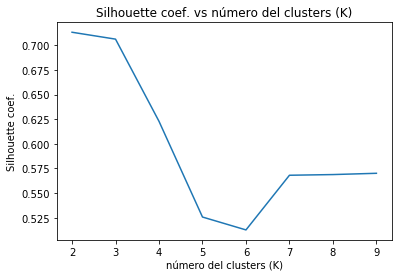

In [ ]:
plt.plot([i for i in range(2,len(silhouette_list)+2)],silhouette_list)
plt.xlabel('número del clusters (K)')
plt.ylabel('Silhouette coef.')
plt.title('Silhouette coef. vs número del clusters (K)')

A continuación, se efectúa la clusterización:

In [ ]:
# se escogió 2 como k, ya que es el pico en la gráfica
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize 

df1=df_completo.copy()
# inicializar el objeto kmeans
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(df1)
labels=kmeans.predict(df1)
Data_Grupo5['labels_kmeans']=labels
print(Data_Grupo5['labels_kmeans'].value_counts())
Data_Grupo5.head()

0    88934
1    11066
Name: labels_kmeans, dtype: int64


,CODIGO_CLIENTE,TIPESTCIVIL,CODPAISNACIONALIDAD,INGRESO,EDAD,EDU,FORMAL,DIGITAL,DESTIPPROVINCIA,EDAD_2,TIPNIVELEDUCACIONAL,FLG_SBS_201909,FLG_MD_NEGATIVO,PERFIL_VINCULACION,FLG_DEUDASBS,SBS_DEUTOTAL,Banco1_DEUTOTAL,Banco2_DEUTOTAL,Banco3_DEUTOTAL,Banco4_DEUTOTAL,OTROS_DEUTOTAL,DIGITALIDAD,CANTIDAD_PRODUCTOS,FLG_SEGUROS,FLG_ACTIVOS,FLG_PASIVOS,FLG_INVERSION,FLG_PASIV_INV,SEMENTO_RIESGO,SBS_DEUTOTAL_trans,Banco1_DEUTOTAL_trans,Banco2_DEUTOTAL_trans,Banco3_DEUTOTAL_trans,Banco4_DEUTOTAL_trans,OTROS_DEUTOTAL_trans,labels_kmeans
0,719353,CAS,PER,3364,61,4,0,0,Lima,62.0,BAC,0.0,0.0,2. POCO VINCULADO,1,2.832510e+03,0.000000,0.000000e+00,0.00000,2832.510000,0.000000,NO DIGITAL,0.0,0,0,0,0,0,E,7.949272,0.000000,0.000000,0.000000,7.949272,0.000000,0
1,8294701,SOL,PER,6216,30,4,1,2,Lima,30.0,BAC,0.0,0.0,5. MUY VINCULADO,1,1.043815e+05,45319.316393,1.986588e+04,15827.11185,14178.569667,9190.583486,DIGITAL,6.0,1,1,1,0,1,B,11.555817,10.721511,9.896809,9.669543,9.559557,9.126044,0
2,6868594,SOL,PER,9026,56,4,1,2,Lima,56.0,TIT,0.0,1.0,3. MEDIO VINCULADO,1,1.162896e+06,0.000000,1.161033e+06,0.00000,3.990000,1859.000000,DIGITAL,1.0,0,0,1,0,1,B,13.966424,0.000000,13.964821,0.000000,1.607436,7.528332,0
3,13983134,SOL,PER,1378,38,4,0,0,Lima,38.0,BAC,0.0,0.0,3. MEDIO VINCULADO,1,3.900000e+01,39.000000,0.000000e+00,0.00000,0.000000,0.000000,INACTIVO,2.0,0,1,1,0,0,D,3.688879,3.688879,0.000000,0.000000,0.000000,0.000000,0
4,143269,CAS,PER,7715,65,3,0,2,Lima,65.0,SEC,0.0,0.0,4. VINCULADO,1,1.851789e+04,8971.220000,9.546670e+03,0.00000,0.000000,0.000000,DIGITAL,4.0,1,1,1,0,1,C,9.826547,9.101888,9.164052,0.000000,0.000000,0.000000,0


In [ ]:
#exportar csv para la regresion logistica en R
df1=df_completo.copy()
df1['Labels_kmeans']=labels
df1=pd.concat([df1,Data_Grupo5['CODIGO_CLIENTE']],axis=1)
df1=pd.merge(df1,pd.read_csv('Vectores_Exito.csv',index_col=0),how='left',left_on='CODIGO_CLIENTE',right_on='CODCLAVECIC')
df1.drop(columns=['CODIGO_CLIENTE','CODCLAVECIC'],inplace=True)
df1.to_csv('df_regresion_final.csv')

# Importancia de las variables
para determinar la importancia de las variables se plotearán barplots que indiquen la proporción de las observaciones que tienen las características, para las variables numéricas, se ploteará el histograma y la función de probabilidad de kernel, de esa manera se podrán notar las preferencias comunes de las observaciones de diferentes clusters.

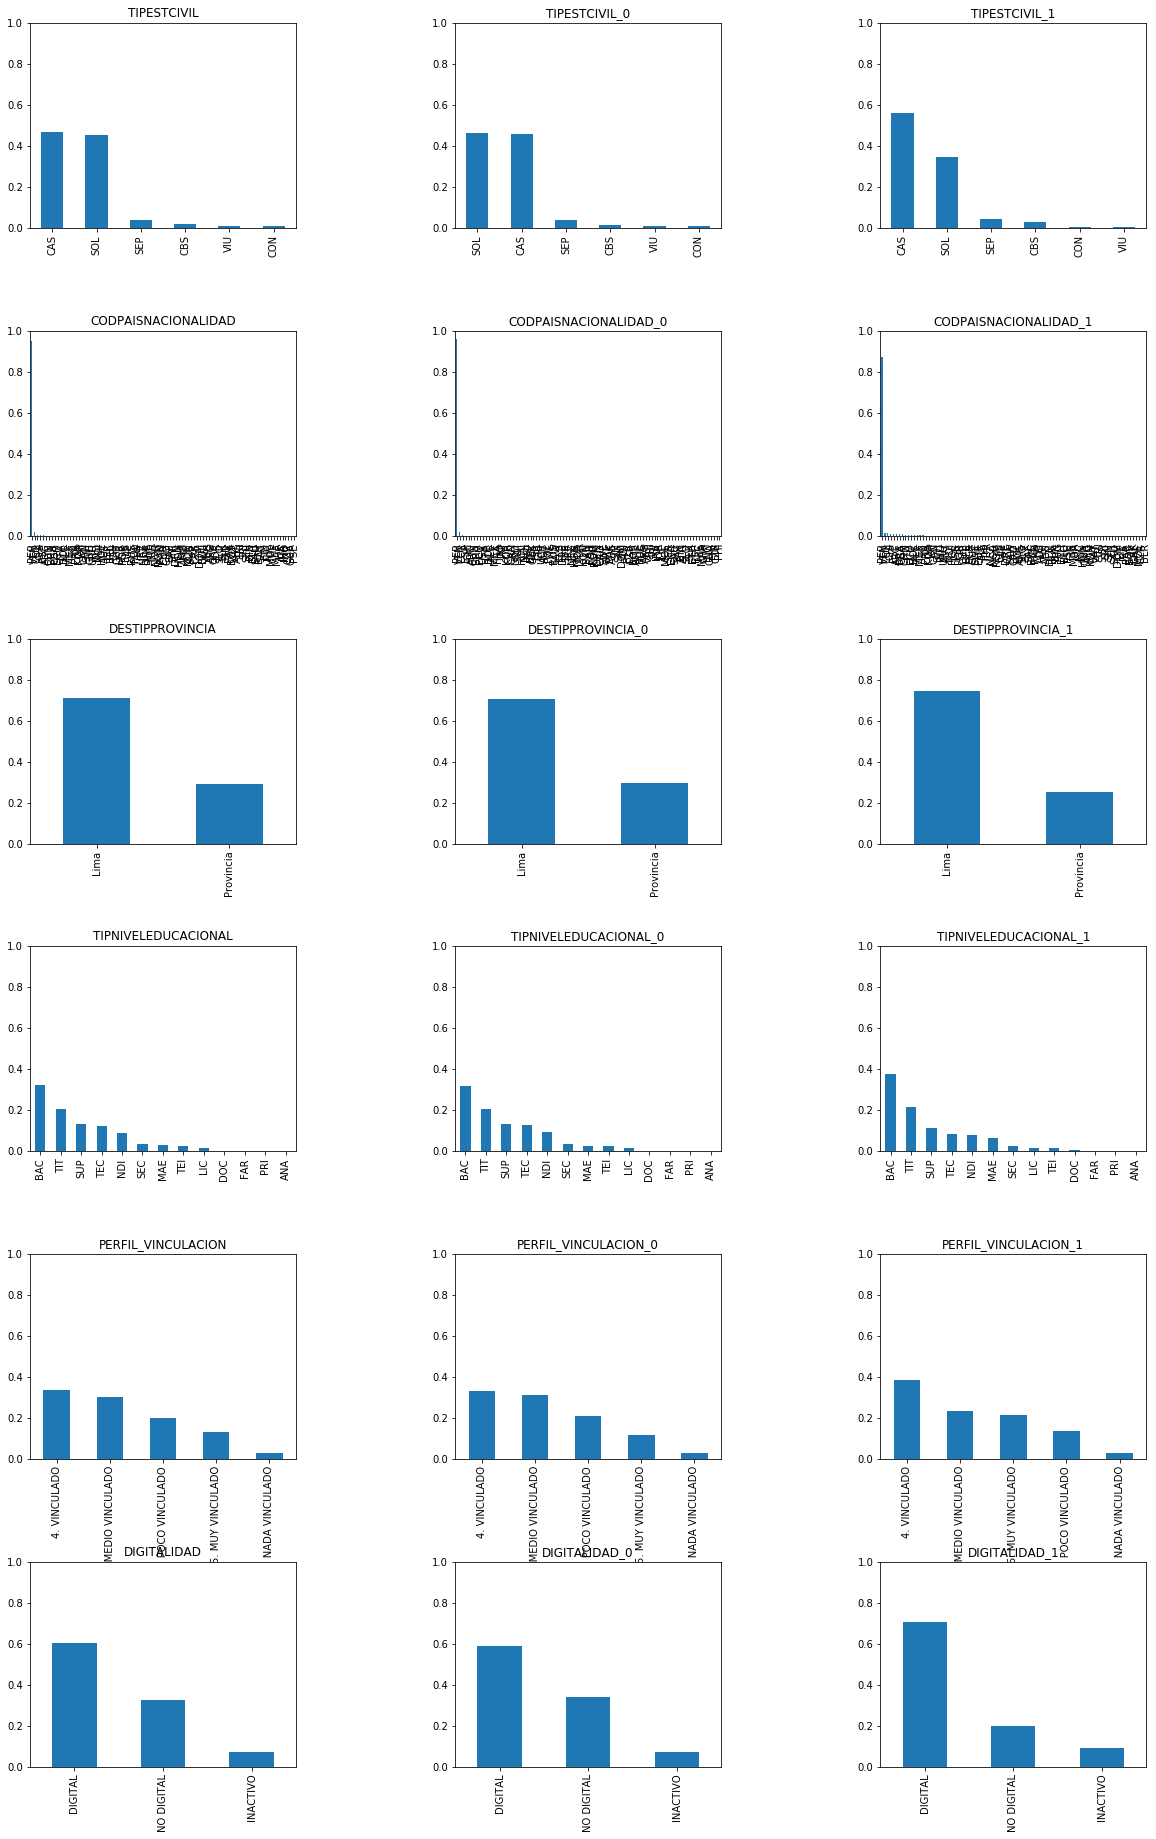

In [ ]:
#Variables categóricas
# se muestran las frecuencias de las variables categóricas, en la primera columna, se muestran las frecuencias de todas las variables,
#en la seginda, filtradas por el grupo 0
# en la tercera columna, por el grupo 1
var_categoricos1=var_categoricos+var_categoricos_int
plt.figure(figsize=(20,100))
plt.subplots_adjust(wspace = 0.6,hspace=0.5)

j=0
for i in range(0,len(var_categoricos1),3):
  
  total=sum(list(Data_Grupo5[var_categoricos1[j]].value_counts()))
  plt.subplot(len(var_categoricos1),3,i+1)
  (Data_Grupo5[var_categoricos1[j]].value_counts()/total).plot(kind='bar')
  plt.title(var_categoricos1[j])
  plt.ylim(0,1)
  
  total_0=sum(list(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==0][var_categoricos1[j]].value_counts()))
  plt.subplot(len(var_categoricos1),3,i+2)
  (Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==0][var_categoricos1[j]].value_counts()/total_0).plot(kind='bar')
  plt.title(var_categoricos1[j]+'_0')
  plt.ylim(0,1)

  total_1=sum(list(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==1][var_categoricos1[j]].value_counts()))
  plt.subplot(len(var_categoricos1),3,i+3)
  (Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==1][var_categoricos1[j]].value_counts()/total_1).plot(kind='bar')
  plt.title(var_categoricos1[j]+'_1')
  plt.ylim(0,1)

  j=j+1
  # plt.title(var_categoricos[i]+'_1')

plt.show()

(0, 1)

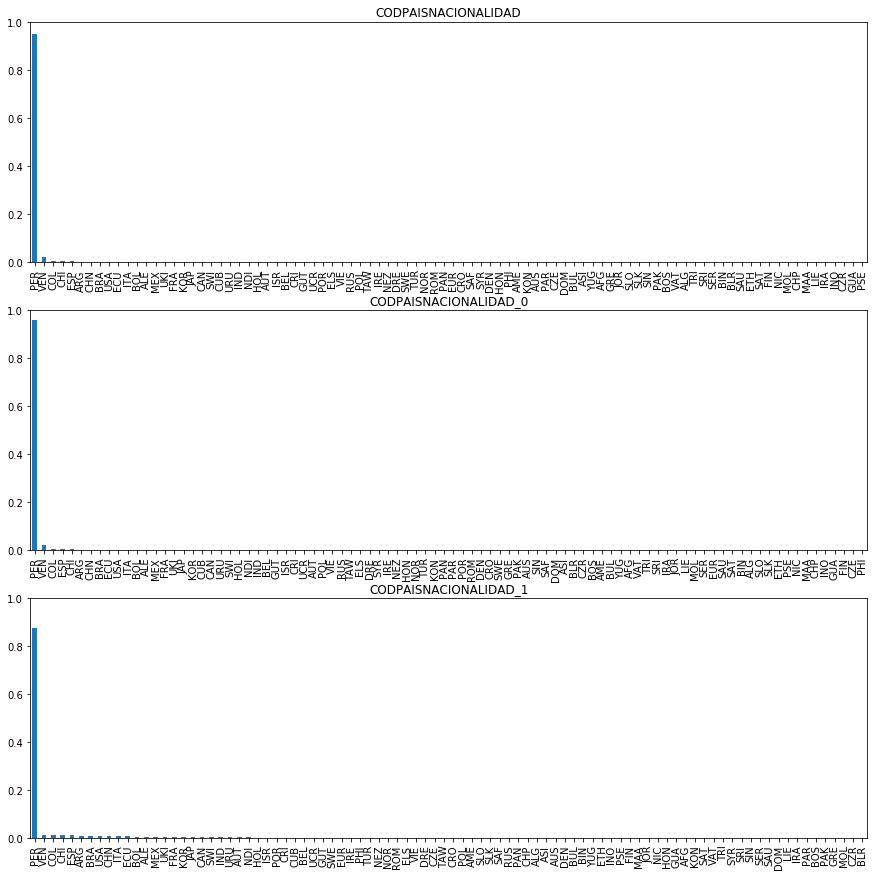

In [ ]:
#para la variable CODPAISNACIONALIDAD
plt.figure(figsize=(15,15))

total=sum(list(Data_Grupo5['CODPAISNACIONALIDAD'].value_counts()))
plt.subplot(3,1,1)
(Data_Grupo5['CODPAISNACIONALIDAD'].value_counts()/total).plot(kind='bar')
plt.title('CODPAISNACIONALIDAD')
plt.ylim(0,1)

total_0=sum(list(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==0]['CODPAISNACIONALIDAD'].value_counts()))
plt.subplot(3,1,2)
(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==0]['CODPAISNACIONALIDAD'].value_counts()/total_0).plot(kind='bar')
plt.title('CODPAISNACIONALIDAD'+'_0')
plt.ylim(0,1)

total_1=sum(list(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==1]['CODPAISNACIONALIDAD'].value_counts()))
plt.subplot(3,1,3)
(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==1]['CODPAISNACIONALIDAD'].value_counts()/total_1).plot(kind='bar')
plt.title('CODPAISNACIONALIDAD'+'_1')
plt.ylim(0,1)


En la variable TIPESTCIVIL, se puede observar que existen mayor probabilidad de que los clientes 
estén casados, en comparación con el grupo 0, en el que se puede notar que los clientes estan en 
una proporción casi igual entre solteros y casados.

En la variable DESTIPROVINCIA, no es significativa para ninguno de los grupos, ya que las proporciones son casi iguales

En la variable TIPNIVELEDUCACIÓNAL,se puede observar que existe mayor probabilidad de que sean bachilleres en el grupo 1 que en el grupo 2, asimismo, existe mayor probabilidad de encontrar técnicos

En la variable PERFIL_VINCULACION, se puede observar que existen más probabilidades de que un cliente del grupo 1 esté muy vinculado, en comparación al grupo 0; además, existe más probabilidad de que un cliente que esté en el grupo 0 esté medio vinculado que en el grupo 1

En la variable DIGITALIDAD, se puede observar que existe mayor probabilidad de que un cliente del grupo 1 tenga un perfil digital que en el grupo 0; asimismo, es más probable que los clientes del grupo 0 no tengan un perfil digital

En la variable CODPAISNACIONALIDAD,se puede notar que los clientes pertenecientes al grupo 0 suelen tener un codigo de pais de venezuela, colombia, españa y chile; en cambio, los clientes del grupo 0, suelen pertenecer a un mayor numero de nacionalidades.

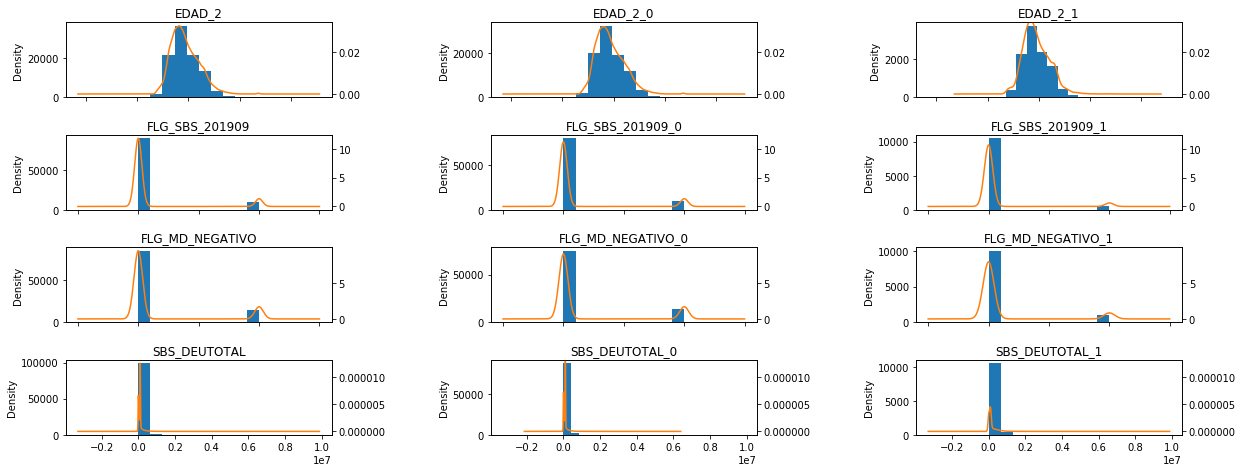

In [ ]:
#Variables numéricas

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace = 0.6,hspace=0.5)

j=0
for i in range(0,len(var_numericos),3):
  
  total=len(Data_Grupo5[var_numericos[j]])
  plt.subplot(len(var_numericos),3,i+1)
  ax=(Data_Grupo5[var_numericos[j]]).plot(kind='hist')
  #ax.set_yticklabels(list(Data_Grupo5[var_numericos[j]].value_counts().index))
  Data_Grupo5[var_numericos[j]].plot(kind='kde', ax=ax, secondary_y=True)
  plt.title(var_numericos[j])
  bottom,top=plt.ylim()
  left,right=plt.xlim()
  
  plt.subplot(len(var_numericos),3,i+2)
  ax1=(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==0][var_numericos[j]]).plot(kind='hist')
  #ax1.set_yticklabels(list(Data_Grupo5[var_numericos[j]].value_counts().index))
  Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==0][var_numericos[j]].plot(kind='kde', ax=ax1, secondary_y=True)
  plt.title(var_numericos[j]+'_0')
  plt.ylim(bottom,top)
  plt.xlim(left,right)

  plt.subplot(len(var_numericos),3,i+3)
  ax2=(Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==1][var_numericos[j]]).plot(kind='hist')
  #ax.set_yticklabels(list(Data_Grupo5[var_numericos[j]].value_counts().index))
  Data_Grupo5.loc[Data_Grupo5['labels_kmeans']==1][var_numericos[j]].plot(kind='kde', ax=ax2, secondary_y=True)
  plt.title(var_numericos[j]+'_1')
  plt.ylim(bottom,top)
  plt.xlim(left,right)

  j=j+1
  

plt.show()

Se puede observar que la mayoría de variables numéricas no son significativas para ambos grupos; sin embargo, la variable SBS_DEUTOTAL es significativa para el grupo 0, ya que se puede notar un cambio en la función de densidad de kernel y un ligero cambio en el histograma.